In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from LogisticRegression import LogisticRegression  # Your custom LogisticRegression class
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
# Initialize and train the logistic regression model
# Use 'softmax' for multiclass classification as it matches the original gradient descent setup
model = LogisticRegression(model_type='softmax', num_classes=3, learning_rate=0.1, iterations=5000)
model.fit(X, y)

Training Softmax Regression: 100%|██████████| 5000/5000 [00:00<00:00, 5234.75it/s]


LogisticRegression(iterations=5000, learning_rate=0.1, model_type='softmax',
                   num_classes=3)

In [5]:
# Prediction and evaluation
y_pred = model.predict(X)
accuracy = np.mean(y == y_pred)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

Classification Accuracy: 98.00%


Training Softmax Regression: 100%|██████████| 1000/1000 [00:00<00:00, 5209.58it/s]


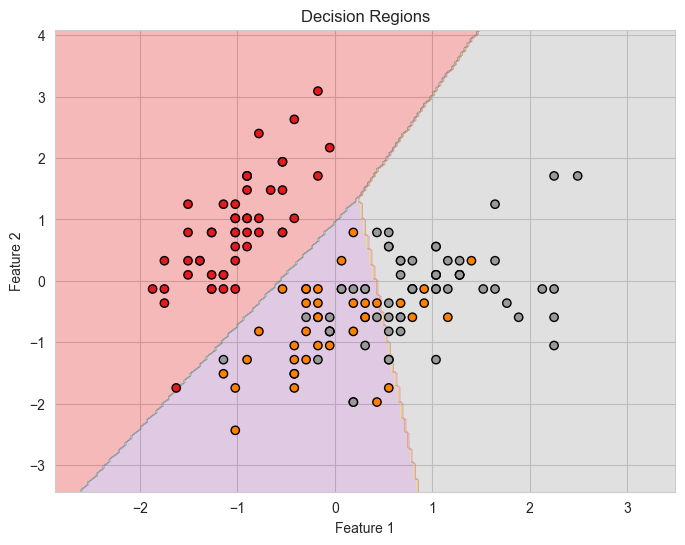

In [6]:
# Visualize decision boundaries (using only the first two features for 2D visualization)
X_vis = X[:, :2]
model_vis = LogisticRegression(model_type='softmax', num_classes=3, learning_rate=0.1, iterations=1000)
model_vis.fit(X_vis, y)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model_vis.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolors='k', cmap='Set1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions')
plt.show()